In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import date, timedelta, datetime
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

In [2]:
tf.random.set_seed(7)
STORAGE_FOLDER = ""
data = pd.read_csv("ECOW.csv")

data['Date']=pd.to_datetime(data['Date'])
data.tail(10)

,Date,Open,Close,Covid Case,Covid Death,Volume,Value
2472,2022-01-06,0.865,0.895,3543,19,61.311,35.98
2473,2022-01-07,0.900,0.890,3381,16,61.311,35.98
2474,2022-01-10,0.890,0.870,2641,18,61.311,35.98
2475,2022-01-11,0.865,0.850,3175,27,61.311,35.98
2476,2022-01-12,0.850,0.880,3198,15,61.311,35.98
2477,2022-01-13,0.880,0.880,3684,12,61.311,35.98
2478,2022-01-14,0.880,0.870,3346,12,61.311,35.98
2479,2022-01-17,0.870,0.885,2342,16,61.311,35.98
2480,2022-01-19,0.880,0.880,3229,13,61.311,35.98
2481,2022-01-20,0.885,0.945,3764,22,61.311,35.98


In [3]:
data.shape

(2482, 7)

In [4]:
# to print the full summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2482 entries, 0 to 2481
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2482 non-null   datetime64[ns]
 1   Open         2482 non-null   float64       
 2   Close        2482 non-null   float64       
 3   Covid Case   2482 non-null   int64         
 4   Covid Death  2482 non-null   int64         
 5   Volume       2482 non-null   float64       
 6   Value        2482 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 135.9 KB


In [5]:
# knowling number of non-missing values for each variable
data.isnull().sum()


Date           0
Open           0
Close          0
Covid Case     0
Covid Death    0
Volume         0
Value          0
dtype: int64

In [6]:
data = data.drop(labels=2481, axis=0)

In [7]:
data.shape

(2481, 7)

In [8]:
#Normalized the data, making the properties more consistent, thus can predict more accurately
#scaler = StandardScaler()
#scaler.fit(X_train)
scaler = MinMaxScaler()

In [9]:
train_df = data.sort_values(by=['Date']).copy()

In [10]:
# We safe a copy of the dates index, before we need to reset it to numbers
date_index = train_df.index

In [11]:
X = data.drop(columns=['Date','Close'], axis=1)
Y = data['Close']

In [12]:
# Leaves room for miscalculations, thus increases the chances of inaccurate predictions.
# Len function is to find the size of dataset.
trainsplit=int(len(X)*0.87)

In [13]:
X_train = X.loc[:trainsplit, : ]
Y_train = Y.loc[:trainsplit]
X_test = X.loc[trainsplit:, :]
Y_test = Y.loc[trainsplit:]

In [14]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(2481, 5) (2159, 5) (323, 5)
(2481,) (2159,) (323,)


In [15]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print(X_train)

[[0.00456221 0.         0.         1.         0.54135605]
 [0.00729954 0.         0.         1.         0.54135605]
 [0.00364977 0.         0.         1.         0.54135605]
 ...
 [0.14128076 0.39711191 0.         0.66899329 0.49520154]
 [0.13906824 0.41516245 0.2        0.66899329 0.49520154]
 [0.13685572 0.36462094 0.         0.66899329 0.49520154]]


In [16]:
#Build ANN Model
classifier = Sequential()

In [17]:
classifier.add(Dense(units = 16, activation = 'relu', input_dim=5))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(units = 16, activation = 'relu'))
#classifier.add(Dropout(rate = 0.1))
#classifier.add(Dense(units = 256, activation = 'relu'))
#classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(units = 16, activation = 'relu'))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(units = 1))

#Compile the model
classifier.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics=['mean_absolute_error'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=200)
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                96        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 657
Trainable params: 657
Non-trainable pa

In [18]:
#Train the model
history = classifier.fit(X_train,Y_train,epochs=150, batch_size=80, validation_data=(X_test, Y_test), callbacks=[es])

Epoch 1/150
27/27 [==============================] - 1s 6ms/step - loss: 0.7733 - mean_absolute_error: 0.7733 - val_loss: 0.1522 - val_mean_absolute_error: 0.1522
Epoch 2/150
27/27 [==============================] - 0s 2ms/step - loss: 0.4189 - mean_absolute_error: 0.4189 - val_loss: 0.3722 - val_mean_absolute_error: 0.3722
Epoch 3/150
27/27 [==============================] - 0s 2ms/step - loss: 0.2670 - mean_absolute_error: 0.2670 - val_loss: 0.2041 - val_mean_absolute_error: 0.2041
Epoch 4/150
27/27 [==============================] - 0s 2ms/step - loss: 0.2005 - mean_absolute_error: 0.2005 - val_loss: 0.2860 - val_mean_absolute_error: 0.2860
Epoch 5/150
27/27 [==============================] - 0s 2ms/step - loss: 0.1845 - mean_absolute_error: 0.1845 - val_loss: 0.2763 - val_mean_absolute_error: 0.2763
Epoch 6/150
27/27 [==============================] - 0s 2ms/step - loss: 0.1710 - mean_absolute_error: 0.1710 - val_loss: 0.3022 - val_mean_absolute_error: 0.3022
Epoch 7/150
27/27 [===

In [19]:
test_loss, test_acc = classifier.evaluate(X_test, Y_test, verbose=2)

11/11 - 0s - loss: 0.2035 - mean_absolute_error: 0.2035 - 24ms/epoch - 2ms/step


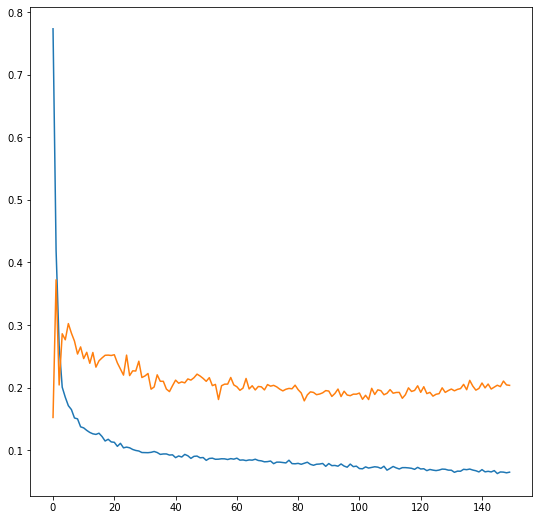

In [20]:
plt.figure(figsize=(9,9))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

No handles with labels found to put in legend.


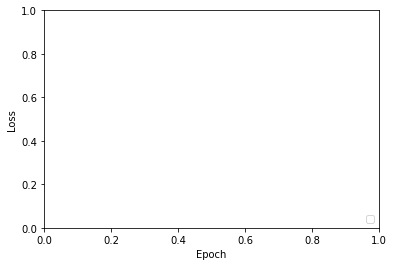

In [21]:
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0,1.0])
plt.legend(loc='lower right')

In [22]:
predictions = classifier.predict(X_test)
predictions_copies = np.repeat(predictions, X_train.shape[1], axis=-1)
predictionsFinal = scaler.inverse_transform(predictions_copies)[:,0]
predictions = predictionsFinal[0:]

In [23]:
def mean_absolute_percentage_error(Y_test, predictions):
  Y_test, predictions = np.array(Y_test), np.array(predictions)
  return np.mean(np.abs((Y_test - predictions) / Y_test)) * 100
mape_ann=mean_absolute_percentage_error(Y_test, predictions)

In [24]:
rmse_ann = np.sqrt(mean_squared_error(Y_test, predictions))
print('Test RMSE: %.3f' % rmse_ann)
mape_ann = mape_ann
print('Test MAPE: %.3f' % mape_ann + '%')
PP_ann = 1-rmse_ann/Y_train.std()
print('PP: %.3f' % PP_ann)

Test RMSE: 0.328
Test MAPE: 47.861%
PP: 0.457


In [25]:
display_start_date = pd.Timestamp('today') - timedelta(days=20)

In [26]:
# Add the date column
data_filtered_sub = data.copy()
data_filtered_sub['Date'] = date_index

In [27]:
train = data_filtered_sub[:trainsplit]
valid = data_filtered_sub[trainsplit:]
valid.insert(1, "Prediction", predictions.ravel(), True)
valid.insert(1, "Difference", valid["Prediction"] - valid["Close"], True)

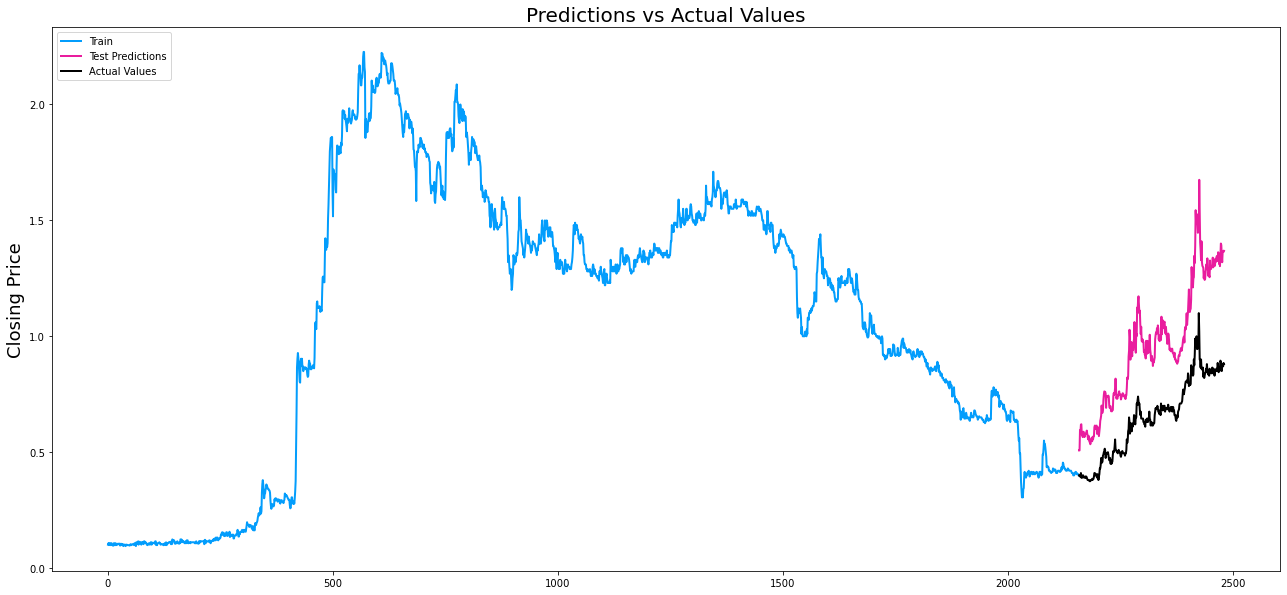

In [28]:
fig, ax1 = plt.subplots(figsize=(22, 10), sharex=True)
xt = train['Date']; yt = train[["Close"]]
xv = valid['Date']; yv = valid[["Close", "Prediction"]]
plt.title("Predictions vs Actual Values", fontsize=20)
plt.ylabel('Closing Price', fontsize=18)
plt.plot(xt, yt, color="#039dfc", linewidth=2.0)
plt.plot(xv, yv["Prediction"], color="#E91D9E", linewidth=2.0)
plt.plot(xv, yv["Close"], color="black", linewidth=2.0)
plt.legend(["Train", "Test Predictions", "Actual Values"], loc="upper left")

In [29]:
#  Create the bar plot with the differences
x = valid['Date']
y = valid["Difference"]

In [30]:
# Create custom color range for positive and negative differences
valid.loc[y >= 0, 'diff_color'] = "#2BC97A"
valid.loc[y < 0, 'diff_color'] = "#C92B2B"

C:\Users\JonyPoi\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\JonyPoi\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


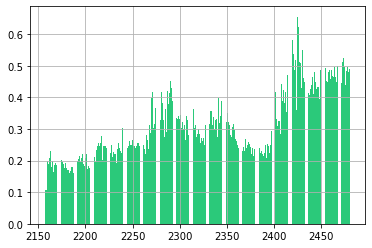

In [31]:
plt.bar(x, y, width=0.8, color=valid['diff_color'])
plt.grid()
plt.show()

In [32]:
last_row = X.iloc[-1:]
#print(last_row)
#input_data = last_row['Open','Close', 'Covid Case', 'Covid Death', 'Volume']
input_data_as_numpy_array = np.asarray(last_row)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
prediction = classifier.predict(std_data)
#print(prediction)
predicted_price = np.round(prediction.ravel()[0], 2)
#plus = '+'; minus = ''
print(f'The predicted close price is {predicted_price}')

The predicted close price is 1.3899999856948853


C:\Users\JonyPoi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
